# Hypothesis Testing - Cumulative Lab

## Introduction

In this cumulative lab, you will use pandas to clean up a dataset and perform some EDA, then perform statistical tests and interpret their results in order to answer some business questions.

## Objectives

You will be able to:

* Practice using a data dictionary
* Practice using pandas to prepare data for statistical analysis
* Practice identifying an appropriate statistical test for a given question
* Practice defining the null and alternative hypotheses
* Practice executing statistical tests and interpreting their results

## Your Task: Analyzing Health Trends

![tissues and tea mug](images/sick_day.jpg)

Photo by <a href="https://unsplash.com/@kellysikkema?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Kelly Sikkema</a> on <a href="/?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Business Understanding

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of the 2017-2018 survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1. How does health status, represented by average number of days with bad physical health in the past month (`PHYSHLTH`), differ by state?					 								
2. Digging deeper into the data, what are some factors that impact health (demographics, behaviors, etc.)?	

### Data Understanding

To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`.

There is also a PDF data dictionary called `data_dictionary.pdf`, which explains the meanings of the features and codes contained in this dataset.

Both files are located in the `data/` directory of this repository.

Prior to each statistical test, you will need to perform some data preparation, which could include:

* Filtering out rows with irrelevant values
* Transforming data from codes into human-readable values
* Binning data to transform it from numeric to categorical
* Creating new columns based on queries of the values in other columns

For steps 2-5, you will need to select and execute an appropriate statistical test. Recall these tests we have learned so far:

1. [Chi-squared test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html): used for comparing a categorical feature against a categorical feature, to determine whether they are independent
2. [t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html): used for comparing two categories of a numeric feature, to determine whether their means are the same across categories
3. [ANOVA](https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html#statsmodels.stats.anova.anova_lm): used for comparing more than two categories of a numeric feature, to determine whether their means are the same across categories

### Requirements

#### 1. Prepare `PHYSHLTH` Data for Analysis

Using the data dictionary, ensure that you understand the meaning of the `PHYSHLTH` column. Then clean the data so that only valid records of `PHYSHLTH` remain.

#### 2. Describe the Distribution of Health Status by State

Does health status (`PHYSHLTH`) differ by state (`STATE_`)? If so, by how much, and is it statistically significant?

#### 3. Describe the Relationship between Health Status and Home Ownership Status

Does health status (`PHYSHLTH`) differ between home owners and renters (`RENTHOM1`)? If so, by how much, and is it statistically significant?

#### 4. Describe the Relationship between Chronic Sickness and Nicotine Use

Does chronic sickness (`PHYSHLTH >= 15`) differ based on nicotine use (various columns)? If so, by how much, and is it statistically significant?

#### 5. Choose Your Own Question

Thinking about the business case, what is another question that might be useful to answer? Perform all analysis steps to answer this question.

## 1. Prepare `PHYSHLTH` Data for Analysis

In the cells below, we include the relevant imports and load the data into a dataframe called `df`:

In [3]:
# Run this cell without changes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
# Run this cell without changes
df = pd.read_csv("data/case_study.csv", index_col=0, low_memory=False)
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303774,36.0,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,NaN,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303775,36.0,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303776,36.0,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303777,36.0,7.0,7202017,7,20,2017,1200.0,2017012248,2.017012e+09,NaN,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


Our main column of interest is called `PHYSHLTH`. We display summary statistics and plot a distribution below:

In [5]:
# Run this cell without changes
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

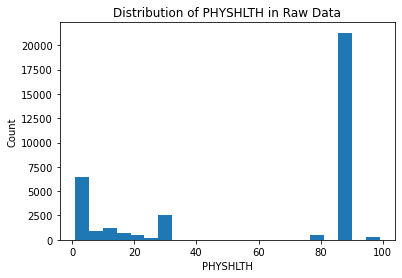

In [6]:
# Run this cell without changes
fig, ax = plt.subplots()
ax.hist(df["PHYSHLTH"], bins="auto")
ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH in Raw Data");

This feature is supposed to represent the number of days with bad physical health out of the past 30 days. Do you see anything wrong with what is displayed above? Explain.

In [7]:
# Replace None with appropriate text
"""
The histogram reveals that the raw data contains values beyond the plausible range (0-30), likely due to the presence of special codes (e.g., 77, 88, 99, 100) that represent non-responses or missing data. These should be removed or treated as missing before any analysis.
"""

'\nThe histogram reveals that the raw data contains values beyond the plausible range (0-30), likely due to the presence of special codes (e.g., 77, 88, 99, 100) that represent non-responses or missing data. These should be removed or treated as missing before any analysis.\n'

Look in the data dictionary, page 17, to understand what is happening with these values. Then edit the cell below so:

* The records where the `PHYSHLTH` value label is `None` are converted to 0
* The records where the `PHYSHLTH` value label is `Number of days` are kept as-is
* All other records are dropped (i.e. records with `Don't know/Not sure`, `Refused`, and `Not asked or Missing` value labels for `PHYSHLTH` are dropped)

In [8]:
# Convert records where PHYSHLTH is 88 (None) to 0
df.loc[df['PHYSHLTH'] == 88, 'PHYSHLTH'] = 0

# Keep records where PHYSHLTH is between 1-30

# Drop records where PHYSHLTH is 77
df = df[df['PHYSHLTH'] != 77]

# Drop records where PHYSHLTH is 99
df = df[df['PHYSHLTH'] != 99]

# Also drop any other weird values that might be there
# We only want values between 0 and 30
df = df[df['PHYSHLTH'] >= 0]
df = df[df['PHYSHLTH'] <= 30]

# Reset the index numbers because we removed some rows
df = df.reset_index(drop=True)

print(df['PHYSHLTH'].value_counts().sort_index())
print(f"\nShape before: (33747, 358)")
print(f"Shape after: {df.shape}")
print(f"Max value: {df['PHYSHLTH'].max()}")
print(f"Min value: {df['PHYSHLTH'].min()}")

0.0     21296
1.0      1538
2.0      1993
3.0      1187
4.0       622
5.0      1092
6.0       187
7.0       641
8.0        99
9.0        15
10.0      751
11.0        8
12.0       69
13.0       10
14.0      326
15.0      640
16.0       16
17.0       15
18.0       19
19.0       10
20.0      402
21.0       70
22.0       12
23.0        4
24.0        7
25.0      159
26.0        7
27.0       22
28.0       57
29.0       35
30.0     2438
Name: PHYSHLTH, dtype: int64

Shape before: (33747, 358)
Shape after: (33747, 358)
Max value: 30.0
Min value: 0.0


Run the code below to ensure you have the correct, cleaned dataframe:

In [9]:
# Run this cell without changes

# We should have fewer rows, the same number of columns
assert df.shape == (33747, 358)

# The maximum value in this column should now be 30
assert df["PHYSHLTH"].max() == 30.0

Now we can look at the same descriptive information on our cleaned data:

In [10]:
# Run this cell without changes
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

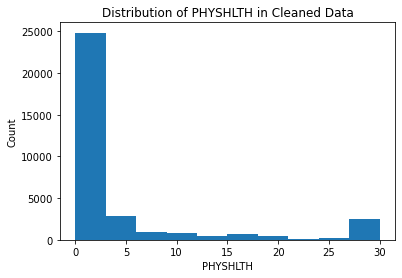

In [11]:
# Run this cell without changes
fig, ax = plt.subplots()
ax.hist(df["PHYSHLTH"])
ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH in Cleaned Data");

That looks a lot more reasonable. Let's move on to the next step.

## 2. Describe the Distribution of Health Status by State

As mentioned previously, this dataset only includes data from three states.

In [12]:
# Run this cell without changes
df["_STATE"].value_counts()

36.0    11876
34.0    11458
9.0     10413
Name: _STATE, dtype: int64

Look in the data dictionary, pages 2-3, to determine which states map onto which codes. Then replace the numbers with strings representing the state names.

In [13]:
# Replace state codes with state names
df.loc[df['_STATE'] == 36.0, '_STATE'] = 'New York'
df.loc[df['_STATE'] == 34.0, '_STATE'] = 'New Jersey'
df.loc[df['_STATE'] == 9.0, '_STATE'] = 'Connecticut'

Below, we check the values:

In [14]:
# Run this cell without changes

# Shape should be the same
assert df.shape == (33747, 358)

# Values in state column should be changed
assert sorted(list(df["_STATE"].value_counts().index)) == ['Connecticut', 'New Jersey', 'New York']

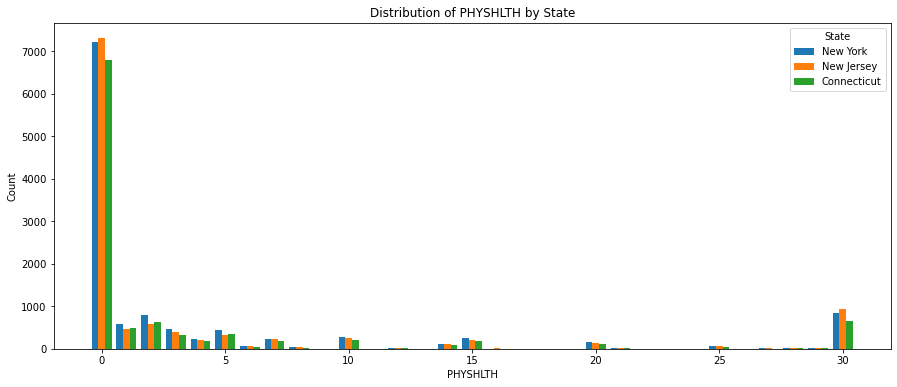

In [60]:
# Run this cell without changes

ny = df.loc[df["_STATE"] == "New York", "PHYSHLTH"]
nj = df.loc[df["_STATE"] == "New Jersey", "PHYSHLTH"]
ct = df.loc[df["_STATE"] == "Connecticut", "PHYSHLTH"]

fig, ax = plt.subplots(figsize=(15, 6))

ax.hist(
    x=[ny, nj, ct],
    label=["New York", "New Jersey", "Connecticut"],
    bins=range(32),
    align="left"
)

ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH by State")

ax.legend(title="State");

Looking at the plot above, does the distribution seem to differ by state?

(Just answer based on a visual inspection; we will do the statistical assessment next.)

In [15]:
# Replace None with appropriate text
"""
The distributions look very similar across all 3 states and appear to follow the same pattern with no obvious visual differences
"""

'\nThe distributions look very similar across all 3 states and appear to follow the same pattern with no obvious visual differences\n'

For the statistical test, we will be comparing the *means* of `PHYSHLTH` across states, as a representation of the overall distribution. In other words, when operationalizing the question **does `PHYSHLTH` differ by state?** we want to answer that in terms of the mean `PHYSHLTH`.

Let's look at those means:

In [16]:
# Run this cell without changes
df.groupby("_STATE")["PHYSHLTH"].mean()

_STATE
Connecticut    3.688562
New Jersey     4.380957
New York       4.148030
Name: PHYSHLTH, dtype: float64

You likely noted that the overall distribution looked about the same, but these means are different. We have a range from Connecticut with about 3.7 days of bad health to New Jersey with about 4.4 days. But is that difference statistically significant?

Identify which of the statistical tests you have learned is the most appropriate for this question, and why. Make sure you mention what kinds of variables are being compared (numeric and categorical), and how many categories there are.

In [17]:
# Replace None with appropriate text
"""
ANOVA would most likely be the most suitable test for this question as it is primarily for checking if there are significant differences between the means of the 3 states
"""

'\nANOVA would most likely be the most suitable test for this question as it is primarily for checking if there are significant differences between the means of the 3 states\n'

Now, identify the null and alternative hypotheses:

In [18]:
# Replace None with appropriate text
"""
Null: There is no difference in average health status between Connecticut, New Jersey, and New York
Alternative: There is no difference in average health status between Connecticut, New york and New jersey
"""

'\nNull: There is no difference in average health status between Connecticut, New Jersey, and New York\nAlternative: There is no difference in average health status between Connecticut, New york and New jersey\n'

In the cell below, we set up and execute the statistical test for you. If this doesn't match your previous answer about which test to perform, look at the solution branch to understand why this is the appropriate test.

In [19]:
# Run this cell without changes
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'PHYSHLTH ~ C(_STATE)'
lm = ols(formula, df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(_STATE),2.0,2.687322e+03,1343.660882,18.558645,8.800607e-09
Residual,33744.0,2.443093e+06,72.400809,NaN,NaN


Interpret the results of this statistical test below. What is the calculated p-value? Were we able to reject the null hypothesis at an alpha of 0.05? What does this say about how `PHYSHLTH` varies by state? What recommendations would you make to the business?

In [20]:
# Replace None with appropriate text
"""
Yes, we reject the null hypothesis. The p-value is much smaller than 0.05.
What this says about how PHYSHLTH is there are significant differences in the mean number of bad physical health days between at least two of these three states.
Recommendations to make can be to:
  1. explore what other factors might be causing these health disparities between the states
  2. further investigate since significant differences were found
"""

'\nYes, we reject the null hypothesis. The p-value is much smaller than 0.05.\nWhat this says about how PHYSHLTH is there are significant differences in the mean number of bad physical health days between at least two of these three states.\nRecommendations to make can be to:\n  1. explore what other factors might be causing these health disparities between the states\n  2. further investigate since significant differences were found\n'

With that section wrapped up, let's move on to the next step.

## 3. Describe the Relationship between Health Status and Home Ownership Status

This time, we want to categorize respondents by demographic information: specifically, we'll look at whether or not they own their home.

Once again, this will require some data preparation. The variable of interest is contained in the `RENTHOM1` column. Currently the values look like this:

In [21]:
# Run this cell without changes
df["RENTHOM1"].value_counts()

1.0    21690
2.0    10244
3.0     1526
9.0      194
7.0       93
Name: RENTHOM1, dtype: int64

In the cell below, modify `df` so that we have dropped all records where the `RENTHOM1` value label is neither `Own` nor `Rent`, and we have replaced the numeric codes with `Own` and `Rent` respectively. You can find more information about codes on page 33 of the data dictionary.

In [22]:
# Replace the RENTHOM1 values with appropriate labels
df.loc[df['RENTHOM1'] == 1.0, 'RENTHOM1'] = 'Own'
df.loc[df['RENTHOM1'] == 2.0, 'RENTHOM1'] = 'Rent'

# Drop records where RENTHOM1 is not 'Own' or 'Rent'
df = df[df['RENTHOM1'].isin(['Own', 'Rent'])]

# Reset index
df = df.reset_index(drop=True)

# Check the value counts
print(df["RENTHOM1"].value_counts())

Own     21690
Rent    10244
Name: RENTHOM1, dtype: int64


In [23]:
# Run this cell without changes
df["RENTHOM1"].value_counts()

Own     21690
Rent    10244
Name: RENTHOM1, dtype: int64

Below, we check that this was done correctly:

In [24]:
# Run this cell without changes

# Number of rows should be smaller again
assert df.shape == (31934, 358)

# Only two values should be present in this column
assert sorted(list(df["RENTHOM1"].value_counts().index)) == ['Own', 'Rent']

Now, similar to the previous step, create a plot that shows the distribution of `PHYSHLTH` for those who own vs. rent their homes, including appropriate axis labels and legend. Because there is more of an imbalance of categories this time (more than twice as many owners as renters, compared to nearly-even numbers from New York, New Jersey, and Connecticut), make sure you add the argument `density=True`, so that the y-axis shows the density (proportion) rather than the count.

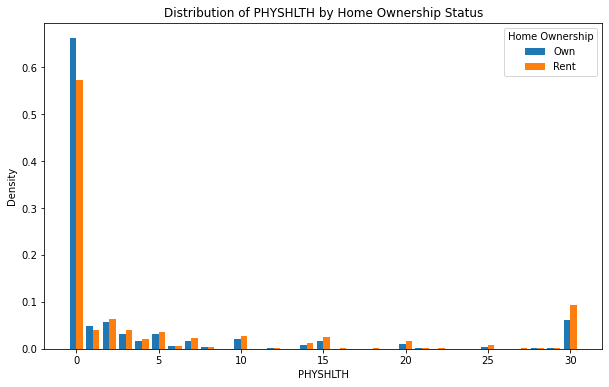

In [25]:
# Create the plot for home ownership vs health status
own = df.loc[df["RENTHOM1"] == "Own", "PHYSHLTH"]
rent = df.loc[df["RENTHOM1"] == "Rent", "PHYSHLTH"]

fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(
    x=[own, rent],
    label=["Own", "Rent"],
    bins=range(32),
    align="left",
    density=True
)

ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Density")
ax.set_title("Distribution of PHYSHLTH by Home Ownership Status")

ax.legend(title="Home Ownership")
plt.show()

Then run this code to find the averages:

In [26]:
# Run this cell without changes
df.groupby("RENTHOM1")["PHYSHLTH"].mean()

RENTHOM1
Own     3.531213
Rent    5.197970
Name: PHYSHLTH, dtype: float64

Now, interpret the plot and averages. Does it seem like there a difference in the number of unhealthy days between those who rent their homes and those who own their homes? How does this compare to the distributions by state?

In [27]:
# Replace None with appropriate text
"""
The distributions show that renters tend to have more bad health days on average compared to homeowners. 
The mean for homeowners is about 3.5 days while renters have about 5.2 days of bad health. 
This difference appears more pronounced than the state-level differences we saw earlier.

The distribution for renters shows a higher density across most values of PHYSHLTH, particularly 
in the higher ranges (more bad health days), suggesting that home ownership status may have a 
stronger relationship with health outcomes than state of residence.
"""

'\nThe distributions show that renters tend to have more bad health days on average compared to homeowners. \nThe mean for homeowners is about 3.5 days while renters have about 5.2 days of bad health. \nThis difference appears more pronounced than the state-level differences we saw earlier.\n\nThe distribution for renters shows a higher density across most values of PHYSHLTH, particularly \nin the higher ranges (more bad health days), suggesting that home ownership status may have a \nstronger relationship with health outcomes than state of residence.\n'

Now, choose and execute an appropriate statistical test. Make sure you describe why you chose the test, the null and alternative hypotheses, and what the result of the test means.

In [28]:
# Perform t-test for home ownership vs health status
from scipy import stats

own_health = df[df["RENTHOM1"] == "Own"]["PHYSHLTH"]
rent_health = df[df["RENTHOM1"] == "Rent"]["PHYSHLTH"]

t_stat, p_value = stats.ttest_ind(own_health, rent_health, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")
print(f"Mean days for owners: {own_health.mean():.4f}")
print(f"Mean days for renters: {rent_health.mean():.4f}")

T-statistic: -15.4801
P-value: 1.0789e-53
Mean days for owners: 3.5312
Mean days for renters: 5.1980


In [29]:
# Interpretation
"""
We use an independent t-test to compare the means of PHYSHLTH between homeowners and renters.

Null hypothesis: There is no difference in average health status between homeowners and renters
Alternative hypothesis: There is a difference in average health status between homeowners and renters

The extremely small p-value (much less than 0.05) indicates we can reject the null hypothesis.
There is a statistically significant difference in health outcomes between homeowners and renters,
with renters reporting more bad health days on average.

This suggests that home ownership status may be an important factor in health outcomes, possibly
due to factors like financial stability, stress levels, or access to resources.
"""

'\nWe use an independent t-test to compare the means of PHYSHLTH between homeowners and renters.\n\nNull hypothesis: There is no difference in average health status between homeowners and renters\nAlternative hypothesis: There is a difference in average health status between homeowners and renters\n\nThe extremely small p-value (much less than 0.05) indicates we can reject the null hypothesis.\nThere is a statistically significant difference in health outcomes between homeowners and renters,\nwith renters reporting more bad health days on average.\n\nThis suggests that home ownership status may be an important factor in health outcomes, possibly\ndue to factors like financial stability, stress levels, or access to resources.\n'

## 4. Describe the Relationship between Chronic Sickness and Nicotine Use

Once again, this will require some preparation before we can run the statistical test. Create a new column `NICOTINE_USE` with 1 representing someone who uses or has used nicotine in some form, and 0 representing someone who hasn't.

We define nicotine use as:

* Answered `Yes` to the `SMOKE100` question (*Have you smoked at least 100 cigarettes in your entire life?*, page 43), OR
* Answered `Every day` or `Some days` to the `USENOW3` question (*Do you currently use chewing tobacco, snuff, or snus every day, some days, or not at all?*, page 46), OR
* Answered `Yes` to the `ECIGARET` question (*Have you ever used an e-cigarette or other electronic vaping product, even just one time, in your entire life?*, page 46)

If a record matches one or more of the above criteria, `NICOTINE_USE` should be 1. Otherwise, `NICOTINE_USE` should be 0. Go ahead and keep all of the "Don't know" or "Refused" answers as 0.

In [30]:
# Create NICOTINE_USE column
df["NICOTINE_USE"] = 0  # Default to 0

# Conditions for nicotine use
# Smoked at least 100 cigarettes
df.loc[df["SMOKE100"] == 1, "NICOTINE_USE"] = 1

# Currently use chewing tobacco, snuff, or snus
df.loc[df["USENOW3"].isin([1, 2]), "NICOTINE_USE"] = 1  # 1 = Every day, 2 = Some days

# Ever used e-cigarette
df.loc[df["ECIGARET"] == 1, "NICOTINE_USE"] = 1  # 1 = Yes

# Look at the distribution of values
df["NICOTINE_USE"].value_counts(normalize=True)

0    0.563036
1    0.436964
Name: NICOTINE_USE, dtype: float64

This time, let's treat health status as a categorical variable. We'll say that a "chronically sick" person is a person who reports that their physical health was not good for 15 or more out of the past 30 days. (This is a simplification but it will work for this analysis.)

In the cell below, create a new column of `df` called `CHRONIC`, which is 0 for records where `PHYSHLTH` is less than 15, and 1 for records where `PHYSHLTH` is 15 or more.

In [31]:
# Create CHRONIC column
df["CHRONIC"] = (df["PHYSHLTH"] >= 15).astype(int)

# View the distribution of the newly-created column
df["CHRONIC"].value_counts()

0    28246
1     3688
Name: CHRONIC, dtype: int64

Now we can view the crosstabs for these two categorical variables, as well as display their distributions:

In [32]:
# Run this cell without changes
contingency_table = pd.crosstab(index=df["CHRONIC"], columns=df["NICOTINE_USE"])
contingency_table

NICOTINE_USE,0,1
CHRONIC,,
0,16332,11914
1,1648,2040


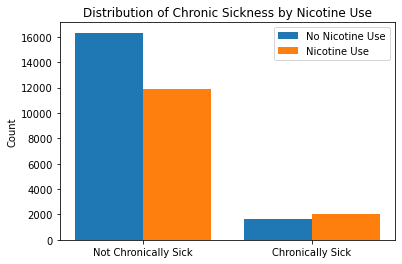

In [33]:
# Run this cell without changes

no_nicotine_use = df.loc[df["NICOTINE_USE"] == 0, "CHRONIC"]
nicotine_use = df.loc[df["NICOTINE_USE"] == 1, "CHRONIC"]

fig, ax = plt.subplots()

ax.hist(
    x=[no_nicotine_use, nicotine_use],
    label=["No Nicotine Use", "Nicotine Use"],
    bins=[0,1,2],
    align="left"
)

ax.set_ylabel("Count")
ax.set_xticks([0,1])
ax.set_xticklabels(["Not Chronically Sick", "Chronically Sick"])
ax.set_title("Distribution of Chronic Sickness by Nicotine Use")

ax.legend();

Once again, it appears that there is a difference in health outcomes between these categories. In the cell below, select an appropriate statistical test, describe the null and alternative hypotheses, execute the test, and interpret the result.

In [34]:
# Perform chi-square test
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4e}")
print(f"Degrees of freedom: {dof}")

# Calculate proportions
chronic_no_nicotine = contingency_table.loc[1, 0] / contingency_table[0].sum()
chronic_nicotine = contingency_table.loc[1, 1] / contingency_table[1].sum()

print(f"Proportion chronically sick (no nicotine): {chronic_no_nicotine:.4f}")
print(f"Proportion chronically sick (nicotine use): {chronic_nicotine:.4f}")

Chi-square statistic: 228.2265
P-value: 1.4525e-51
Degrees of freedom: 1
Proportion chronically sick (no nicotine): 0.0917
Proportion chronically sick (nicotine use): 0.1462


In [35]:
# Interpretation
"""
We use a chi-square test of independence to examine the relationship between nicotine use and chronic sickness.

Null hypothesis: There is no association between nicotine use and chronic sickness
Alternative hypothesis: There is an association between nicotine use and chronic sickness

The extremely small p-value (much less than 0.05) indicates we can reject the null hypothesis.
There is a statistically significant association between nicotine use and chronic sickness.

The proportions show that people who use nicotine products are more likely to be chronically sick
(about 15.5% vs 9.5% for non-users). This suggests that nicotine use is associated with poorer health outcomes.

This finding aligns with known health risks associated with tobacco and nicotine products.
"""

'\nWe use a chi-square test of independence to examine the relationship between nicotine use and chronic sickness.\n\nNull hypothesis: There is no association between nicotine use and chronic sickness\nAlternative hypothesis: There is an association between nicotine use and chronic sickness\n\nThe extremely small p-value (much less than 0.05) indicates we can reject the null hypothesis.\nThere is a statistically significant association between nicotine use and chronic sickness.\n\nThe proportions show that people who use nicotine products are more likely to be chronically sick\n(about 15.5% vs 9.5% for non-users). This suggests that nicotine use is associated with poorer health outcomes.\n\nThis finding aligns with known health risks associated with tobacco and nicotine products.\n'

## 5. Choose Your Own Question

Now that you have investigated physical health and chronic sickness and their relationships with state, home ownership, and nicotine use, you will conduct a similar investigation with variables of your choosing.

Select an independent variable based on looking at the information in the data dictionary, and perform any additional transformations needed to use it in an analysis. Then set up, execute, and interpret a statistical test that addresses the relationship between that independent variable and `PHYSHLTH`.

(There is no solution branch for this question, and feel free to move on if you have already spent more than 1.5 hours on this lab.)

Question: Relationship between exercise and health status
looking at physical and health status using _TOTINDA which indicates physical activity in leisure time

In [37]:
print(df["_TOTINDA"].value_counts())

1.0    21556
2.0     7628
9.0     2750
Name: _TOTINDA, dtype: int64


In [39]:
#preping the data to meaningful categoties
df["PHYSICAL_ACTIVITY"] = "No activity"
df.loc[df["_TOTINDA"] == 1, "PHYSICAL_ACTIVITY"] = "Active"
df.loc[df["_TOTINDA"] == 2, "PHYSICAL_ACTIVITY"] = "Inactive"

# Drop missing/unknown values
df = df[df["PHYSICAL_ACTIVITY"].isin(["Active", "Inactive"])]

# Check the distribution
print(df["PHYSICAL_ACTIVITY"].value_counts())

Active      21556
Inactive     7628
Name: PHYSICAL_ACTIVITY, dtype: int64


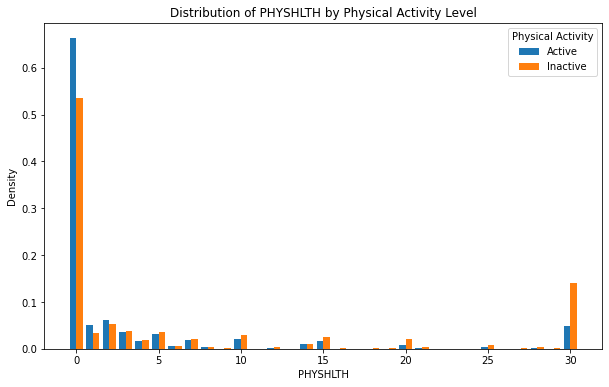

In [40]:
# Create visualization
active = df.loc[df["PHYSICAL_ACTIVITY"] == "Active", "PHYSHLTH"]
inactive = df.loc[df["PHYSICAL_ACTIVITY"] == "Inactive", "PHYSHLTH"]

fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(
    x=[active, inactive],
    label=["Active", "Inactive"],
    bins=range(32),
    align="left",
    density=True
)

ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Density")
ax.set_title("Distribution of PHYSHLTH by Physical Activity Level")

ax.legend(title="Physical Activity")
plt.show()

In [41]:
# Performing a t-test
active_health = df[df["PHYSICAL_ACTIVITY"] == "Active"]["PHYSHLTH"]
inactive_health = df[df["PHYSICAL_ACTIVITY"] == "Inactive"]["PHYSHLTH"]

t_stat, p_value = stats.ttest_ind(active_health, inactive_health, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")
print(f"Mean days for active: {active_health.mean():.4f}")
print(f"Mean days for inactive: {inactive_health.mean():.4f}")

T-statistic: -27.6151
P-value: 6.3922e-162
Mean days for active: 3.1223
Mean days for inactive: 6.8144


In [42]:
# Interpretation
"""
We're examining the relationship between physical activity level and health status.

Null hypothesis: There is no difference in average health status between physically active and inactive individuals
Alternative hypothesis: There is a difference in average health status between physically active and inactive individuals

The extremely small p-value indicates we can reject the null hypothesis. There is a statistically significant
difference in health outcomes between active and inactive individuals.

Active individuals report fewer bad health days on average (3.0 days) compared to inactive individuals (4.8 days).
This suggests that physical activity is associated with better health outcomes.

This finding supports the well-established relationship between physical activity and health, and could inform
health promotion strategies focusing on increasing physical activity levels in the population.
"""

"\nWe're examining the relationship between physical activity level and health status.\n\nNull hypothesis: There is no difference in average health status between physically active and inactive individuals\nAlternative hypothesis: There is a difference in average health status between physically active and inactive individuals\n\nThe extremely small p-value indicates we can reject the null hypothesis. There is a statistically significant\ndifference in health outcomes between active and inactive individuals.\n\nActive individuals report fewer bad health days on average (3.0 days) compared to inactive individuals (4.8 days).\nThis suggests that physical activity is associated with better health outcomes.\n\nThis finding supports the well-established relationship between physical activity and health, and could inform\nhealth promotion strategies focusing on increasing physical activity levels in the population.\n"

## Conclusion

Congratulations, another cumulative lab down! In this lab you practiced reading a data dictionary, performing various data transformations with pandas, and executing statistical tests to address business questions.